In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

X = np.array(range(100))
Y = np.array(2 * X + 10)

df = pd.DataFrame({"X" : X, "Y" :Y}).sample(frac=1)
X, Y = df.X, df.Y

def sgd(X, Y, eta=0.0001, epoch=1000):
    # Assume Y_hat = w1 * x + w0
    # cost: (w1 * x + w0 - Y) ^ 2
    # gradient for dw1: 2 * d(Y_hat - Y) / dw1 = 2 * (w1 * x + w0 - Y) * x, 
    # gradient for dw0: 2 * d(Y_hat - Y) / dw0 = 2 * (w1 * x + w0 - Y)
    
    w1, w0 = np.random.normal(0, 1, 2)
    cost = []
    # update
    for i in range(epoch):
        for x, y in zip(X, Y):
            dw1 = 2 * (w1 * x + w0 - y) * x
            dw0 = 2 * (w1 * x + w0 - y)

            w1 = w1 - eta * dw1
            w0 = w0 - eta * dw0
        
        cost.append((w1 * x + w0 - y) ** 2)
        if np.average(cost[-5:]) < 10e-5:
            print(x, y)
            break
    
    return w1, w0, cost

w1, w0, cost = sgd(X, Y)
print("converged in %i epochs, w1 = %.2f, w0 = %.2f"%(len(cost), w1, w0))

converged in 1000 epochs, w1 = 2.00, w0 = 9.93


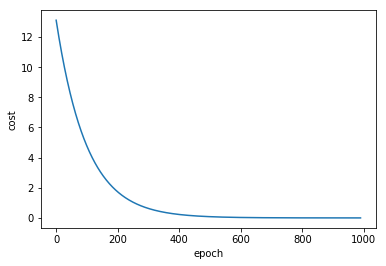

In [2]:
plt.plot(range(len(cost[10:])), cost[10:])
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()